In [1]:
# Loading the necessary libraries

# Data Visulization and Wrangling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

matplotlib.style.use('ggplot')

In [2]:
# Reaading the data
cleaned=pd.read_csv("D:/github/dataSets/dpa_project/updatedcv.csv")

In [3]:
# creating the copy of the data
df_copy = cleaned.copy()

## Exploratory Data Analysis

### Visualize the Pairwise Relationships

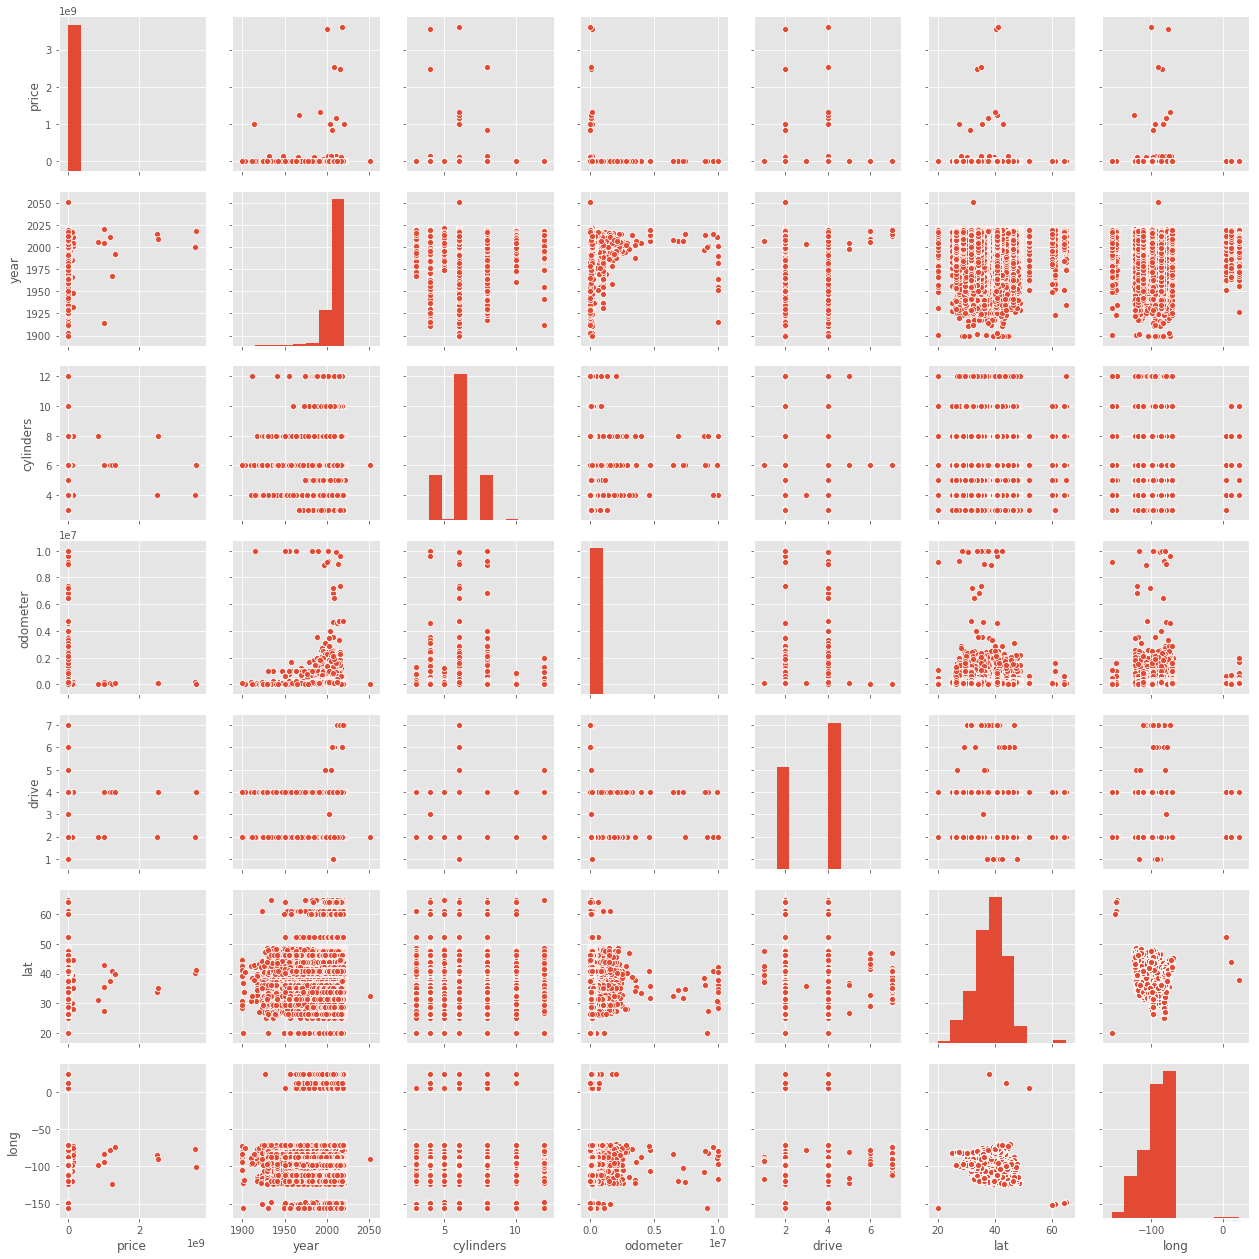

In [98]:
# creates the pairplot
sns.pairplot(cleaned.loc[:,"price":"long"])
plt.show()

### Correlation Heatmap

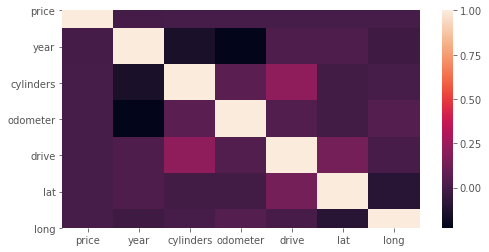

In [24]:
# heatmap
sns.heatmap(cleaned.loc[:,"price":"long"].corr())

### Correlation Matrix
##### There is no signification correlation between numerical variables

In [4]:
# correlation table
cleaned.loc[:,"price":"long"].corr()

,price,year,odometer,lat,long
price,1.000000,-0.004102,-0.001053,-0.000582,0.000830
year,-0.004102,1.000000,-0.226688,0.023803,-0.020807
odometer,-0.001053,-0.226688,1.000000,-0.007012,0.042035
lat,-0.000582,0.023803,-0.007012,1.000000,-0.097300
long,0.000830,-0.020807,0.042035,-0.097300,1.000000


## Univariate Analysis

### Cylinder Attribute

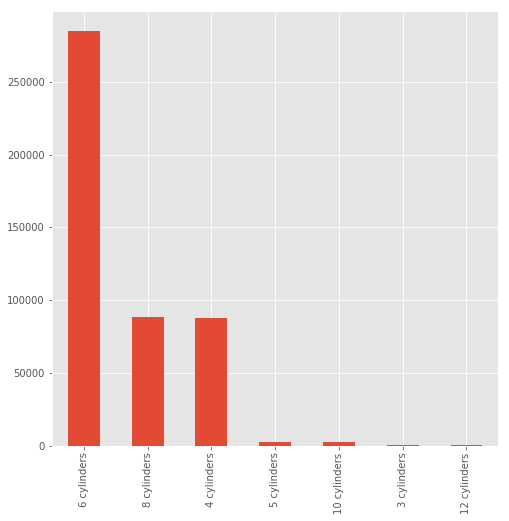

In [5]:
# creating the sorted bar plot for cylinder atrribute
plt.figure(figsize=(8,8))
df_copy.cylinders.value_counts().plot.bar()

The plot clearly indicates that most of the cars have 6 cylinders

### Paint Color

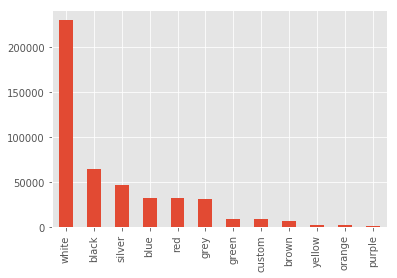

In [7]:
# creating the sorted bar count for paint color attribute
df_copy.paint_color.value_counts().plot.bar()

The plot clearly indicates that most of the cars are white in color

### Price Attribute

In [9]:
# six-number summary
print (df_copy.price.describe())

count    4.659980e+05
mean     5.992131e+04
std      1.001272e+07
min      1.000000e+00
25%      5.000000e+03
50%      1.050000e+04
75%      1.895000e+04
max      3.600029e+09
Name: price, dtype: float64


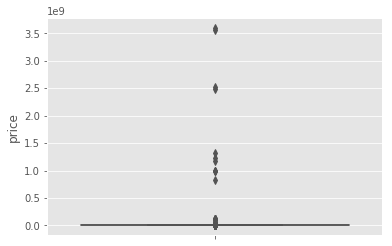

In [10]:
# looking for the outlier well we can catch alot
sns.boxplot(y=df_copy.price)

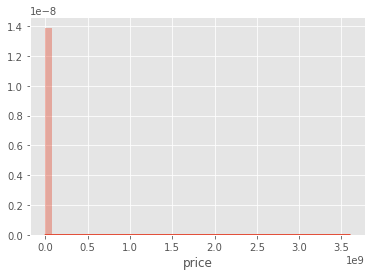

In [11]:
# looking at the distribution
sns.distplot(df_copy.price)

We shouldnt be swayed by some of the figures above. This mean is close to 600k becuase of few car prices that are in the millions. On further anaysis of the prices column, I found that there were 43 cars that were being sold for values >600k. These include a $1,000,000 Ferrari and a $1,000,000,000 chevy! I could also see that there were a lot of dirty values such as 999,999,999 ans 123,456,789. We can safely conclude that the data is dirty and its upto us to refine it if we want to derive some valuable insights. Some possible reasons for dirt prices:

Users might have forgot to put a decial point. For eg: a Jeep Jeep Wrangler Rubicon 2018 starts at around 35,000. I saw a price for the same at 3,200,000.

We have to make some hard decisions now. There are way too many dubious values that hinder us from doind any kind of analysis. I saerch online for averge car prices this year. [Here](https://mediaroom.kbb.com/2018-02-01-Average-New-Car-Prices-Rise-Nearly-4-Percent-For-January-2018-On-Shifting-Sales-Mix-According-To-Kelley-Blue-Book) is an excellent link on the topic. Considering the worst case, we can take the High-end Luxury Car atrribute. Cars in this section start at an averge of arounf ~100k.

We can also drop these extreme values in order to increase the power of price prediction.Firstly, cars that had listed as more than 40,000 are dropped.The outliers are address only small percentage of buyers and also cars that priced less than 2000 were also dropped , because these are noise points.

In [12]:
# dimensions of the data
df_copy.shape

(465998, 19)

In [13]:
# removing the outliers , price value between (<2000,>40000)
df_copy.drop(df_copy[df_copy["price"]<2000].index,inplace=True)
df_copy.drop(df_copy[df_copy["price"]>40000].index,inplace=True)

In [14]:
# dimensions of the data
df_copy.shape

(421961, 19)

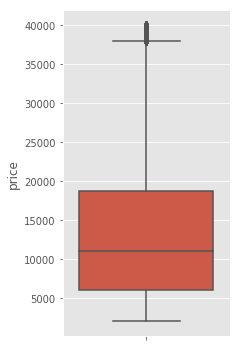

In [15]:
# we can see most of the outliers are removed
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df_copy);

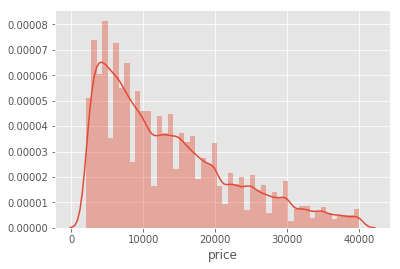

In [16]:
# here we can find, it is right skewed and we need to take care of this in later stage
sns.distplot(df_copy.price)

### Condition & Status

The listed vehicles are in different condition and for the purpose this analysis, we don't want to take in consideration vehicles in very poor condition.

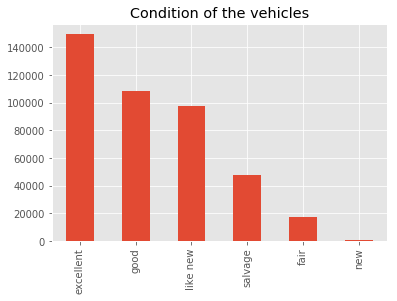

In [17]:
# creating the sorted bar plot for condition of the vehicle
df_copy.condition.value_counts().plot.bar()
plt.title("Condition of the vehicles")
plt.show()

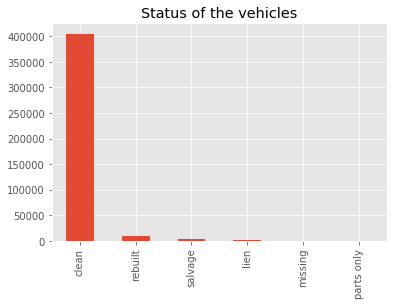

In [18]:
# creating the sorted bar plot for status of the vehicle
df_copy.title_status.value_counts().plot.bar()
plt.title("Status of the vehicles")
plt.show()

For our analysis, we don't want to consider cars which have the condition/status:

    salvage
    lien
    missing
    parts only
    Therefore, we will delete those rows

In [19]:
# removing the un-necessary categories from the title status attribute
df_copy.drop(df_copy[df_copy["title_status"]=="parts only"].index,inplace=True)
df_copy.drop(df_copy[df_copy["title_status"]=="missing"].index,inplace=True)
df_copy.drop(df_copy[df_copy["title_status"]=="lien"].index,inplace=True)

### Year Attribute

In [20]:
print ('Top 10 car manufacturing years:')
print (df_copy['year'].value_counts().iloc[:10])

Top 10 car manufacturing years:
2016.0    32250
2013.0    30250
2015.0    30234
2014.0    29984
2012.0    29078
2011.0    27538
2008.0    25791
2017.0    25288
2007.0    23335
2010.0    21682
Name: year, dtype: int64


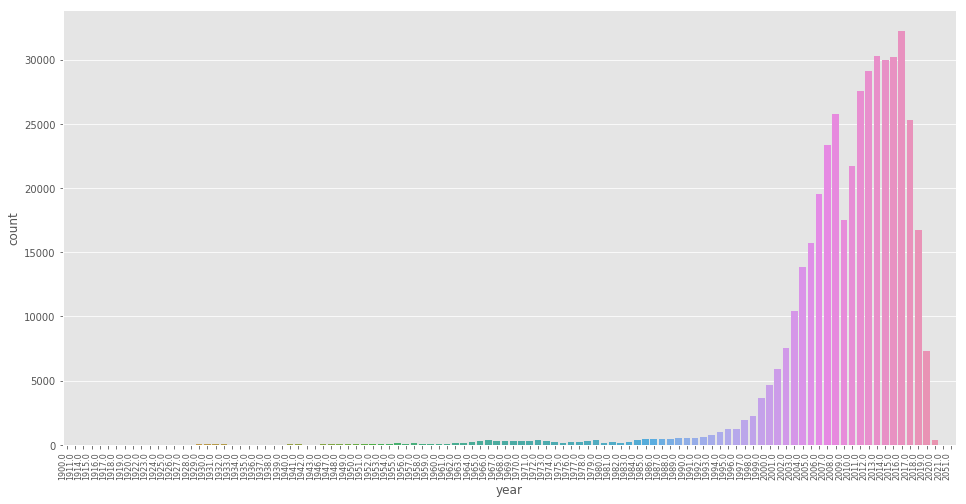

In [21]:
# we can see the distrbution/ bar plot for the number of cars per year
plt.figure(figsize=(16,8))
ax = sns.countplot(x='year',data=df_copy);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);

In [22]:
# Hightest/End five years in the data set, which are outliers/mistaken placed by user
sorted(df_copy.year.unique(),reverse=True)[:5]

[2051.0, 2021.0, 2020.0, 2019.0, 2018.0]

We can see from the plot and the value counts , there are years 2051, 2021 , which were noise points and for a robust prediction we will be removing the models that are less that 1960 and fill those years with median value

In [23]:
# dimensions of the data
df_copy.year.shape

(419068,)

In [24]:
# removing the cars that sold below 1960 from the dataset
df_copy =  df_copy[(df_copy.year>=1960)]

In [25]:
# filling all the outliers or misplaced data with median year
yearmed=df_copy["year"].median()
df_copy["year"].fillna(yearmed)
for index, row in df_copy.iterrows():
    if(row["year"]>2020):
        df_copy.at[index,"year"]=yearmed

In [26]:
df_copy.year.shape

(417414,)

### Ranking Of Manufactures

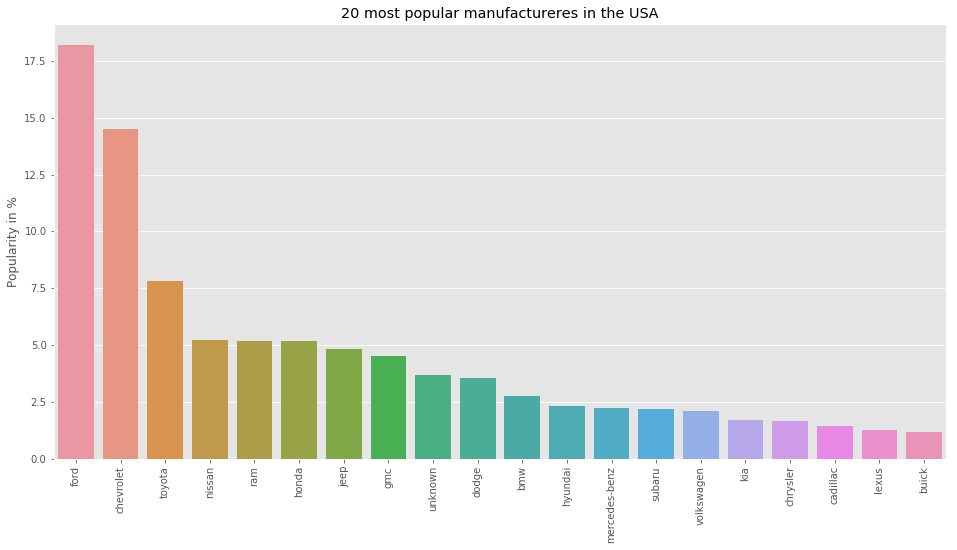

In [27]:
# creating the sorted bar plot for manufactures attribute in percentage/proporation in the data set
manufacturers = df_copy["manufacturer"].value_counts().div(len(df_copy)).mul(100)
manufactuters_TOP20 = manufacturers[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=manufactuters_TOP20.index, y=manufactuters_TOP20.values)
plt.title("20 most popular manufactureres in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

As we can see the first and the second place are taken by american companies (Ford and Chevrolet). Then there are Japanese brands: Toyota, Nissan and Honda. And there is somethin new if you are European - RAM. This is a trucks and van manufacturer belonging to the italian Fiat company. Another less known in Europe brand is Buick - it's an american brand manufacturing luxury cars, however it's main market is China.

### Odometer

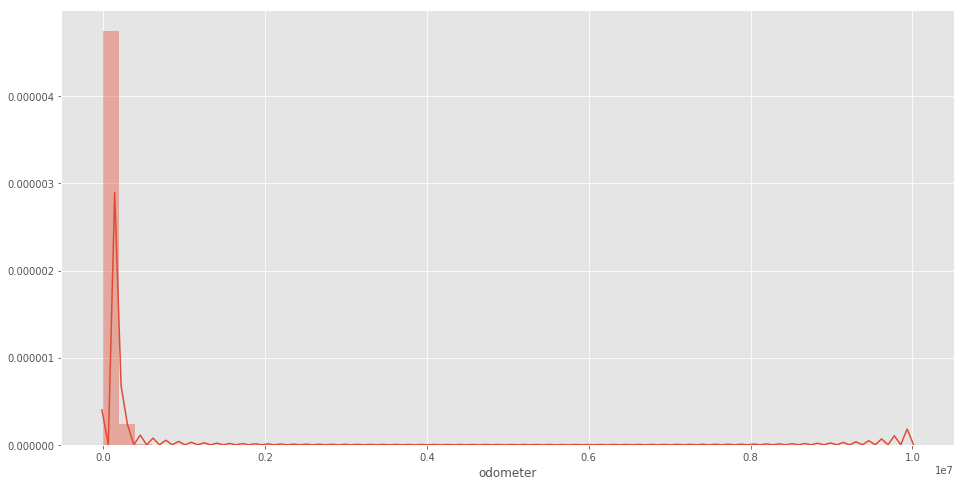

In [28]:
# created the histogram and looking at the distribution of the odometer
plt.figure(figsize=(16,8))
sns.distplot(df_copy.odometer)
plt.show()

In [29]:
# dimensions of the data
df_copy.odometer.shape

(417414,)

In [30]:
# removing the ouliters/extreme's for the modelling
df_copy=df_copy[(df_copy.odometer < 300000) & (df_copy.odometer > 10)]

In [31]:
df_copy.odometer.shape

(413646,)

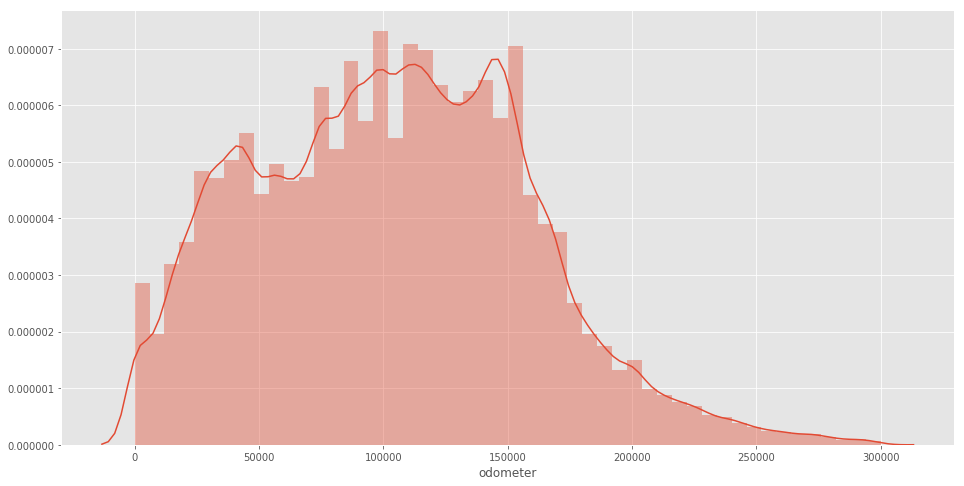

In [32]:
# looking at the hisotgram, it is slightly normal distributed
plt.figure(figsize=(16,8))
sns.distplot(df_copy.odometer)
plt.show()

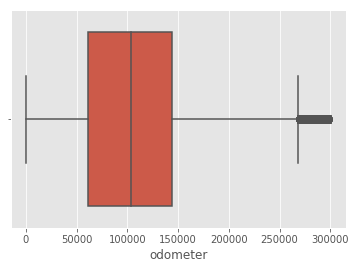

In [33]:
# looking at the five-number summary using boxplot
sns.boxplot(df_copy.odometer)

### State

In [34]:
# converted all the places into regions in USA for the encoding purpose
northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]

for index, row in df_copy.iterrows():
    if(row["state"] in northeast):
        df_copy.at[index,"state"]="northeast"
    if(row["state"] in midwest):
        df_copy.at[index,"state"]="midwest"
    if(row["state"] in south):
        df_copy.at[index,"state"]="south"
    if(row["state"] in west):
        df_copy.at[index,"state"]="west"

### Dropping the un-neccessary columns for Modelling

In [35]:
# removing the un-necessary columns from the data set
df_copy.drop(["url","lat","long","id","model","region"],axis=1,inplace=True)

# Feature Engineering

In [36]:
# created the age attribute for the modelling
df_copy["age"] = df_copy.year.apply(lambda x: int(2020-x))

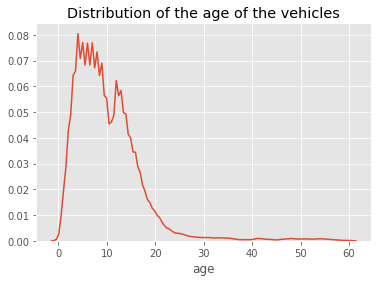

In [37]:
# looking at the histogram/distribution of the age variable created (right-skewed)
sns.distplot(df_copy.age, hist = False)
plt.title("Distribution of the age of the vehicles")
plt.show()

In [38]:
# removing the outlier and making it normal distribution
df_copy = df_copy[(df_copy.age >= 0) & (df_copy.age <= 30)]

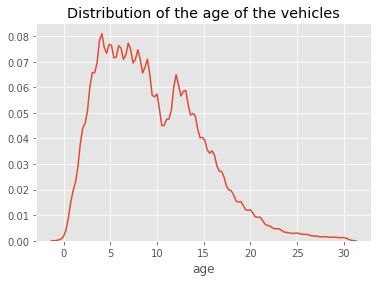

In [39]:
sns.distplot(df_copy.age, hist = False)
plt.title("Distribution of the age of the vehicles")
plt.show()

To facilitate our analysis, we will create a new column with the age of the vehicle (age = 2020-year_build). We will keep vehicle with an age between 0 and 30 because we are more interested in "recent" vehicles.

# Find the best time to buy or sell a car¶


Finally we come to the most interesting part, the price by age of the vehicle depending on the vehicle type. To calculate the price, the median has been choosen, because as we've seen in the boxplot with the prices, there are quite a lot of outliers, even limiting the prices between 100 and 100.000$. This way it will be more stable.

In [40]:
# Images of cars for the graphics
images = {'all':'https://i.imgur.com/1vNeS3S.png',
         'SUV':'https://i.imgur.com/hDAAIQ1.png', 
         'wagon':'https://i.imgur.com/AScvovW.png', 
         'sedan':'https://i.imgur.com/geFnoDw.png',
         'convertible':'https://i.imgur.com/OJyUNkl.png',
         'pickup':'https://i.imgur.com/RZI2aBP.png',
         'hatchback':'https://i.imgur.com/I6nKBgU.png',
         'truck':'https://i.imgur.com/d5ImbCK.png',
         'coupe':'https://i.imgur.com/zf6cHos.png',
         'van':'https://i.imgur.com/ly3Fg5V.png',
         'mini-van':'https://i.imgur.com/CfmLXIG.png'}

def display_price(df, age = (0,12), price = (2000,20000), vehicle_type = "all", state = "all"):
    # Display the median price of vehicles depending on its type and its state.
    
    if state != "all":
        df = df[df["state"] == state]
    
    if vehicle_type != "all":
        df = df[df["type"] == vehicle_type]
        
    df = df[(df["age"] <= age[1]) & (df["age"] >= age[0])]
    
    df = df[(df["price"] >= price[0]) & (df["price"] <= price[1])]
    
    price_age = pd.pivot_table(df, values = "price", index = "age", aggfunc= np.median)
    price_age.columns = ["Median Price"]
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes([0,0,1,1])
    ax2 = fig.add_axes([0.6,0.47,.35,.35])
    
    ax.plot(price_age["Median Price"], lw = 5)
    
    ax2.imshow(plt.imread(images[vehicle_type]))
    ax2.set_title(f"Vehicle type: {vehicle_type}\nNumber of vehicles: {df.shape[0]}\nCountry: USA\nUS-State: {state}", fontsize = 15)
    ax2.axis('off')
    
    ax.set_title(f"Median price by age of the vehicles",fontsize=25)
    ax.set_ylim(0,price_age["Median Price"].max()+1000)
    ax.set_xlabel("Age", fontsize = 15)
    ax.set_ylabel("Median price in $", fontsize = 15)
    
    ax.tick_params(axis='both', which='major', labelsize=15) 

    plt.show()

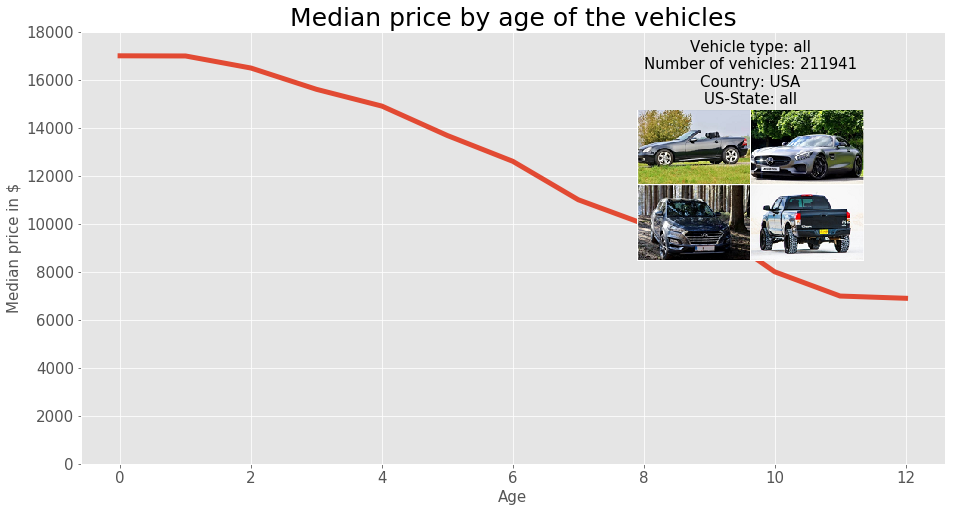

In [41]:
# looking at the median price by age of the vehicles
display_price(df_copy, vehicle_type="all")

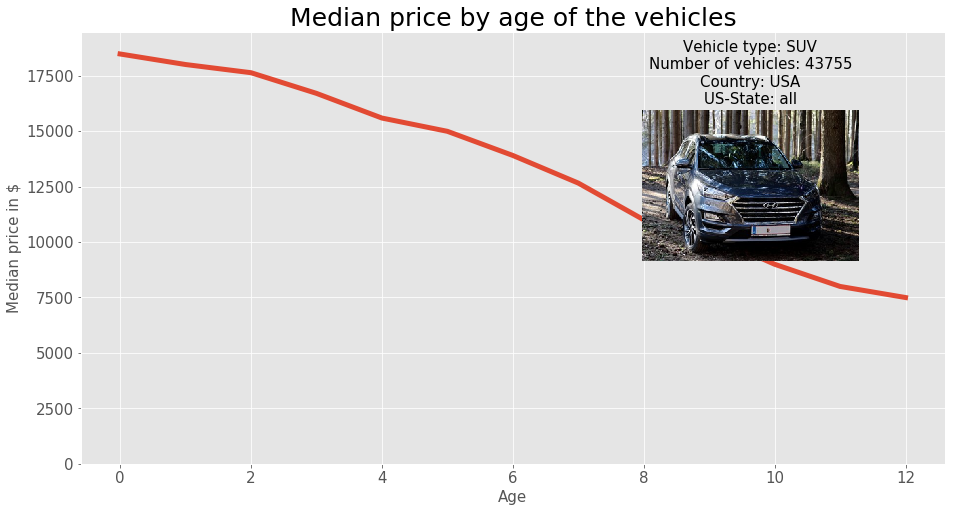

In [44]:
# Individual car type categories in dataset - SUV
for t in df_copy.type.unique()[2:3]:
    display_price(df_copy, vehicle_type=t)

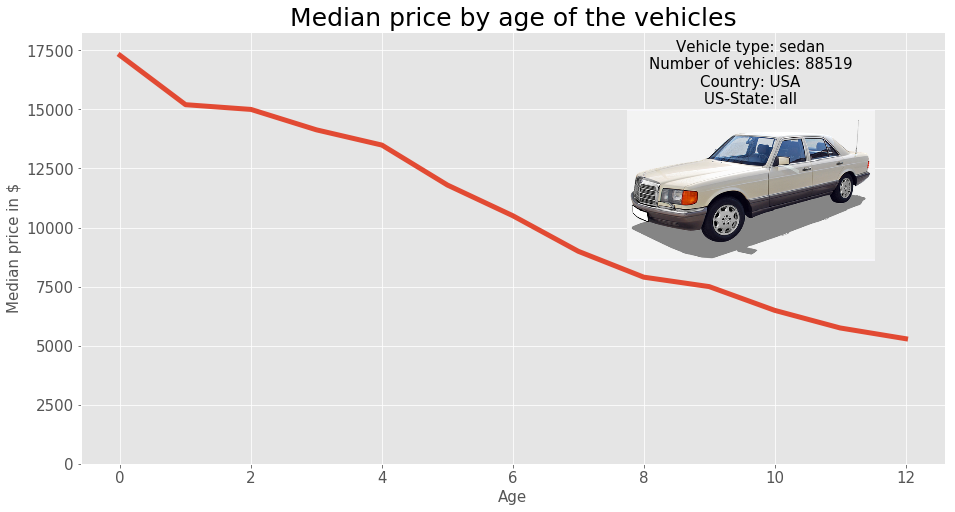

In [46]:
# Individual car type categories in dataset - Sedan
for t in df_copy.type.unique()[3:4]:
    display_price(df_copy, vehicle_type=t)

As we have seen, the price depends on the age and the type of vehicle. Planning strategically when a car is bought and sold makes it possible to lose as little money as possible. In general, to buy a 2 years old car and to sell it when it is 4-5 years old seem to be a good choice.

## Bi-Variate and Multivariate Analysis

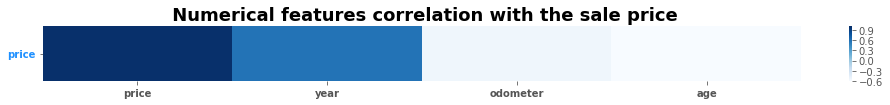

In [49]:
# looking at the sorted correlation plot with sales atribute
num=df_copy.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [50]:
# created the  sorted correlation plot with sales atribute
Num=numcorr['price'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,price
price,1
year,0.585481
odometer,-0.518606
age,-0.585481


### Car Price and Odometer

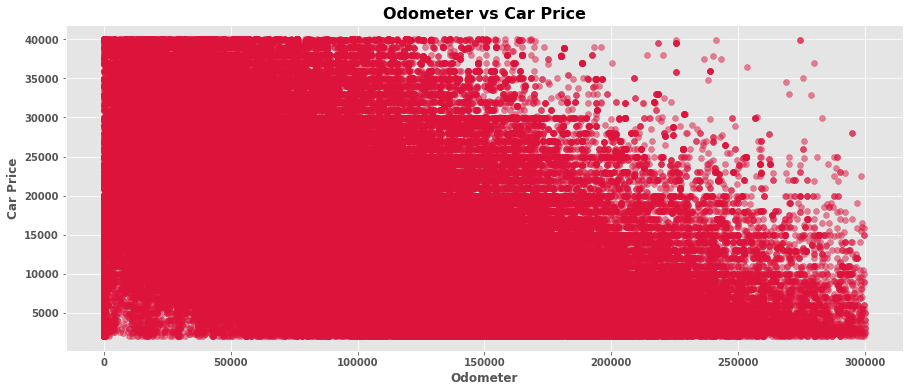

In [52]:
# Scatter plot between Odometer and Car price for correlation
plt.figure(figsize=(15,6))
plt.scatter(x=df_copy.odometer, y=df_copy.price, color='crimson', alpha=0.5)
plt.title('Odometer vs Car Price', weight='bold', fontsize=16)
plt.xlabel('Odometer', weight='bold', fontsize=12)
plt.ylabel('Car Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

### Saving the dataframe

In [47]:
# writing/saving the cleanded data for modelling
df_copy.to_csv("D:/github/dataSets/dpa_project/cleanedDataForModelling.csv",index=False)